# Inflatable arc beam in a wind tunnel
![arc beam](img/arc_beam.svg)

Similar to straight beam example $T=qb$. The bridle line tension is given by 
$$
B_y = \frac{1}{2} T \\
B = \frac{B_y}{\sin \alpha} = \frac{T}{2 \sin \alpha}\\
B_x= \frac{T }{2 \tan \alpha}
$$

The bending moment in the middle is given by 
$$
M = -\frac{q b^2}{8} - \frac{q s^2}{2} + B_x s + \frac{B_y b}{2} \\
M = -\frac{q b^2}{8} - \frac{q s^2}{2} + B_x s + \frac{q b^2}{4} 
$$
where $s=R (1- \cos \theta)=\frac{b}{2 \sin \theta} (1- \cos \theta)$ is the sagitta. When the arc is a half a circle ($\theta=\pi/2$) then $s=b/2$ and the moment in the middle is
$$
M = \frac{B_x b}{2}=\frac{q b^2}{4 \tan \alpha}
$$

$$
M = \frac{1}{8} q b^2 - \frac{1}{2}q s^2 + \frac{1}{2 \tan \alpha}q b s
$$


Additionally, the aerodynamic load induces an axial force which is given by $N = -q s$. Consequently, the axial stress in the middle is
$$
\sigma_x = p + \frac{N}{A} - \frac{B_x}{A} - \frac{M r}{I}\\
$$

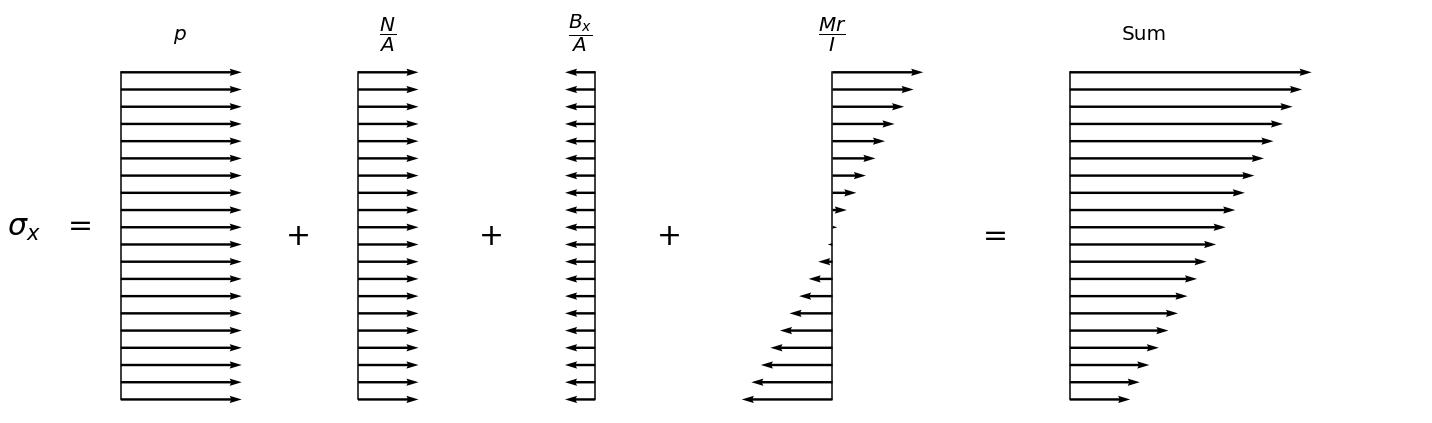

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,figsize=(20,6))
n = 20
scale = 2
pressure = 1 * np.ones(n)
axial = 0.5 * np.ones(n)
compression = -0.25 * np.ones(n)
bending = 0.75 * np.linspace(-1,1,n)
net = pressure + axial + compression + bending
loads = [pressure, axial, compression, bending, net]
y = np.linspace(0,1,n)
operators = ['+', '+','+','=',None]
labels = ['$p$', '$\dfrac{N}{A}$', '$\dfrac{B_x}{A}$', '$\dfrac{M r}{I}$','Sum'] 
label_names = ['pressure', 'normal','compression', 'bending','sum']
for i, (l, op, label) in enumerate(zip(loads, operators, labels)):
    ax.quiver(i*1 + np.zeros(n), y, l, 0, scale=scale, units='xy', width=0.01)
    ax.plot([i*1, i*1],[0,1],color='k')
    if i != len(loads)-1:
        annx = (i + (i+1) + (np.max(np.append(l,0))+ np.min(np.append(loads[i+1],0)))/scale)/2
        ax.annotate(op, (annx, 0.5), fontsize=30, ha='center', va='center')
    ax.annotate(label, (i + np.mean(l)/2/scale,1.1),ha='center', fontsize=20)
ax.annotate('$\sigma_x$   =', (-0.3, 0.5), ha='center', fontsize=30)
ax.set_xlim(-0.3,5.5)
ax.set_ylim(-0.05, 1.2)
plt.axis('off')
plt.tight_layout()
plt.show()

$$
\sigma_x = p + \frac{q s}{\pi r^2} - \frac{qb}{2\pi r^2  \tan \alpha} - \frac{4 M}{\pi r^3}\\
\sigma_x = p + \frac{q s}{\pi r^2} - \frac{qb}{2\pi r^2  \tan \alpha} - \frac{-\frac{3}{2 r} q b^2 - \frac{2 q s^2}{r} + \frac{2}{r \tan \alpha}q b s}{\pi r^2}\\
p=\frac{q}{\pi r^2} \left( -s + \frac{b}{2 \tan \alpha } -\frac{3 b^2}{2 r}  - \frac{2 s^2}{r} + \frac{2 b s}{r \tan \alpha}  \right)
$$

### Example 1: V3 LEI kite

Let us put the kite in the wind tunnel with 30 m/s wind velocity. The front bridle line is assumed to take half of the loading and therefore the chord length is $c=1.35 m$. The section lift coefficient is assumed $c_L = 1.2$ and the arc forms a half a circle. What is the required pre-inflation pressure to keep the kite taut?
$$
\begin{aligned}
q&=\frac{1}{2}\rho U^2 c_L b\\
\rho&=1.2kg/m^3 \\
U&=30m/s \\
c_L&=1\\
b&=1m\\
r&=0.1m\\
\tan \alpha &= \frac{11m}{4.15m}\\
\theta&=\pi/2\\
\end{aligned}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
rho   = 1.2
U     = 30
cl    = 1
c     = 1.35
b     = 1
q     = 0.5 * rho * U**2 * cl * c
r     = 0.1
alpha = np.arctan(11/4.15)
theta = np.deg2rad(90) #np.pi/2 #+ np.pi*0.5

def stress_mass(theta, print_results=False):
    s = b/2/np.sin(theta) * (1-np.cos(theta))
    mass = theta * b / np.sin(theta)

    axial = -s
    bridle = b/2/np.tan(alpha)
    moment1 = b**2/2/r
    moment2 = - 2 * s**2/r
    moment3 = 2*b*s/r/np.tan(alpha)
    moment = moment1 + moment2 + moment3
    p = q / np.pi / r**2 * (axial + bridle + moment)
    if print_results:
        print("Required pre-inflation pressure is p > {:.2f} bar which is {:.1f} % higher than 0.5 bar".format(p / 1e5, p/0.5e5*100-100))
        print("The axial stress is composed as follows:")
        print("{:6} {:6} {:6}".format('normal', 'bridle', 'moment'))
        print("{:<6.2f} {:<6.2f} {:<6.2f}".format(axial, bridle, moment))

        print("The moment is composed as follows:")
        print("{:6} {:6} {:6}".format('By+qy', 'qx', 'Bx'))
        print("{:<6.2f} {:<6.2f} {:<6.2f}".format(moment1, moment2, moment3))
        return
    return p, mass
stress_mass(theta, True)

Required pre-inflation pressure is p > 0.80 bar which is 60.6 % higher than 0.5 bar
The axial stress is composed as follows:
normal bridle moment
-0.50  0.19   3.77  
The moment is composed as follows:
By+qy  qx     Bx    
5.00   -5.00  3.77  


With an anhedral angle of $\theta=90^o$ the required pressure is 33 % lower than for the straight beam. The stress from the bending still dominates the other stresses.

Let's compare the required pre-inflation pressure and the mass of the kite with different anhedral angles. 

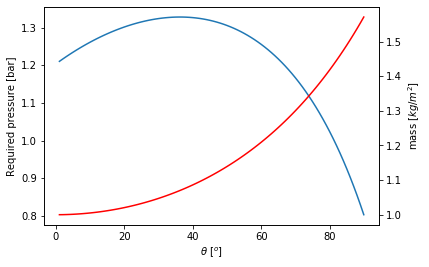

In [3]:
thetas = np.deg2rad(np.linspace(1,90,90))
p, mass = stress_mass(thetas)
ax = plt.subplot()
ax.plot(np.rad2deg(thetas), p/1e5)
ax.set_xlabel(r'$\theta$ [$^o$]')
ax.set_ylabel('Required pressure [bar]')
ax2 = ax.twinx()
ax2.plot(np.rad2deg(thetas), mass, 'r')
ax2.set_ylabel('mass [$kg/m^2$]')

plt.show()

Note that the projected area of the kite is fixed. With zero anhedral angle, the mass is unity which means that it is the same as for the straight beam. As expected, the mass increases non-linearly with the anhedral angle. With 90 degrees of anhedral angle, the tips do not contribute to the effective area of the kite anymore. Interestingly, the required pre-inflation pressure peaks at around 40 degrees of anhedral angle which is related to the ratio of bending moment from $q_x$ and $B_x$.